# <h2><b> Đồ án thực hành </b></h2>
<h1 style='color:red;text-align:center;font-size:35px'><b>Chủ đề: Dự đoán giá rượu vang</b></h1>

# <h1 style='color:blue;text-align:center;font-size:30px'><b>Phần II</b></h1>

# <h3>Các thành viên trong nhóm</h3>
<li> Phan Xuân Hoài - 20120481 </li>
<li> Lê Kinh Luân - 1612355 </li>
<li> Nguyễn Minh Nghĩa - 20120534</li>
<li> Phạm Quốc Hưng - 19120522</li>

### Import những thư viện cần thiết

In [1741]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_theme()

import os
import re
import statistics
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

In [1742]:
import sys
sys.executable

'D:\\anconda\\python.exe'

In [1743]:
cd champagne/champagne

[WinError 3] The system cannot find the path specified: 'champagne/champagne'
D:\NM KHDL\Do An\-NMKHDL_20_21\champagne\champagne


### Đọc file 'champagnes_info_cleaned.csv' vào dataframe df

In [1744]:
df = pd.read_csv('./dataset/champagne_info_cleaned.csv', index_col=0)
df.head(10)

,Ma_sp,Ten_sp,Gia,Xuat_xu,Nong_do,Dung_tich,Giong_nho,Mau_sac,Loai_ruou,Thuong_hieu,Vung_lam_vang
0,VNPV-3958,Rượu Champagne Bottega Stardust Prosecco,3563000.0,Ý,11.0,750.0,Glera,vàng rơm nhạt,Rượu Champagne,Bottega,Veneto
1,VNPV-9463,Rượu Champagne Carbon F1,8517000.0,Pháp,12.0,750.0,"Chardonnay,Pinot meunier,Pinot Noir",trắng,Rượu Champagne,Delamotte,Champagne
2,VNPV1-1823,Rượu Champagne Charles Mignon Premium Reserve,1641000.0,Pháp,13.5,750.0,"Chardonnay,Pinot meunier,Pinot Noir",vàng,Rượu Champagne,Charles Mignon,Champagne
3,VNPV-836,Rượu Champagne De Castellane Brut,753000.0,Pháp,11.0,375.0,Chardonnay,xanh nhạt,Rượu Champagne,De Castellane,Champagne
4,VNPV-4233,Rượu Champagne Delamotte Blanc De Blancs,3810000.0,Pháp,12.5,750.0,Chardonnay,trắng trong,Rượu Champagne,Delamotte,Champagne
5,VNPV-1956,Rượu Champagne Delamotte Brut,1761000.0,Pháp,12.0,750.0,Chardonnay,vàng,Rượu Champagne,Delamotte,Champagne
6,VNPV-3667,Rượu Champagne Delamotte Rose,2956000.0,Pháp,12.0,750.0,"Chardonnay,Pinot Noir,Pinot Meunier",hồng,Rượu Champagne,Delamotte,Champagne
7,VNPV-1976,Rượu Champagne Duval Leroy Thierry Drapeau,1779000.0,Pháp,12.5,750.0,Chardonnay,vàng,Rượu Champagne,Champagne Duval Leroy,Champagne
8,VNTK3-480,Rượu Champagne JP Chenet Brut Blanc,480000.0,Pháp,13.0,750.0,Chardonnay,đỏ đậm,Rượu Vang Nổ,JP Chenet,Pays d’Oc
9,VNBMF-744,Rượu Champagne JP Chenet Divine Chardonnay,750000.0,Pháp,12.5,750.0,Chardonnay,vàng rơm,Rượu Vang Nổ,JP Chenet,Pays d’Oc


In [1745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934 entries, 0 to 3933
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ma_sp          3934 non-null   object 
 1   Ten_sp         3934 non-null   object 
 2   Gia            3934 non-null   float64
 3   Xuat_xu        3934 non-null   object 
 4   Nong_do        3934 non-null   float64
 5   Dung_tich      3934 non-null   float64
 6   Giong_nho      3934 non-null   object 
 7   Mau_sac        3934 non-null   object 
 8   Loai_ruou      3934 non-null   object 
 9   Thuong_hieu    3934 non-null   object 
 10  Vung_lam_vang  3934 non-null   object 
dtypes: float64(3), object(8)
memory usage: 368.8+ KB


<h2 style='color:#45ccb1d4;text-align:center;font-size:25px'><b>A. Mô hình hóa dữ liệu</b></h2> 

### Import thư viện

In [1746]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

### Lựa chọn các đặc trưng để mô hình

### Tiền xử lý trước khi chạy mô hình

In [1747]:
def strip_list_string(ls):
    new_ls = []
    for s in ls:
        if type(s) != float and len(s) > 1:
            new_ls.append(s.strip())
    return new_ls

In [1748]:
df['Giong_nho'] = df['Giong_nho'].str.split(',')
df['Giong_nho'] = df['Giong_nho'].apply(strip_list_string)
df['Giong_nho'].explode().value_counts().sum()

6240

In [1749]:
giong_nho_freq = df['Giong_nho'].explode().value_counts(normalize=True) 

In [1750]:
giong_nho_ls = giong_nho_freq[giong_nho_freq < 0.0002].index
giong_nho_ls

Index(['Petite Sirah', 'Gouveio', 'Tinta Carvalha', 'Cabernte Franc',
       'Aragonês', 'Caberet Sauvignon', 'Touriga 50 %', 'Cortese',
       'Susumaniello', 'Tinta de toro',
       ...
       'Carrignan', 'arbenet Sauvignon', 'Raboso',
       'Obeidi – Rolle – Clairette', 'Lagrein', 'Piedirosso', 'Teroldego',
       'Coda di Volpe Biancha', 'Malvasia nera', 'Nerello Mascalese'],
      dtype='object', length=158)

In [1751]:
mlb = MultiLabelBinarizer(sparse_output=True)
giong_nho_encoded = mlb.fit_transform(df.pop('Giong_nho'))
df_encoded = pd.DataFrame.sparse.from_spmatrix(giong_nho_encoded,index=df.index, columns=mlb.classes_)

In [1752]:
new_col = df_encoded[giong_nho_ls].sum(axis=1) >= 1
new_col = new_col.apply(int)

In [1753]:
# df_encoded = df_encoded.drop(columns=giong_nho_ls)
# df_encoded = df_encoded.assign(other=new_col)

In [1754]:
# df_encoded

In [1755]:
# df = df.drop(columns=['Ma_sp', 'Ten_sp'])

# target_name = "Gia"
# target = df[target_name]

# data = df.drop(columns=[target_name])

In [1756]:
# from sklearn.compose import make_column_selector as selector

# numerical_columns_selector = selector(dtype_exclude=object)
# categorical_columns_selector = selector(dtype_include=object)

# numerical_columns = numerical_columns_selector(data)
# categorical_columns = categorical_columns_selector(data)

In [1757]:
# categorical_columns

In [1758]:
column_name = [ 'Xuat_xu','Mau_sac', 'Loai_ruou', 'Thuong_hieu', 'Vung_lam_vang']

In [1759]:
# categorical_preprocessor = OneHotEncoder(sparse=False,handle_unknown="ignore", min_frequency=0.001)
# numerical_preprocessor = StandardScaler()

# preprocessor = ColumnTransformer([
#     ('one-hot-encoder', categorical_preprocessor, categorical_columns),
#     ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [1760]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline

# model = make_pipeline(preprocessor, LinearRegression())
# model

In [1761]:
# data_train, data_test, target_train, target_test = train_test_split(
#     data, target, random_state=42)

In [1762]:
# _ = model.fit(data_train, target_train)

In [1763]:
# model.predict(data_test)[:5]

In [1764]:
# target_test[:5]

In [1765]:
encoder = OneHotEncoder(sparse=False,handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

other_categorite_encoded = encoder.fit_transform(df[column_name])
columns_encoded = encoder.get_feature_names_out(column_name)
df_encoded = df_encoded.join(pd.DataFrame(other_categorite_encoded,index=df.index, columns=columns_encoded))


df_encoded = df_encoded.join(df[[ 'Nong_do', 'Dung_tich']])

D:\anconda\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1766]:
df_encoded

,10 % Hárslevlű,100 % Touriga Nacional,100% Nho Tinta De Toro,100% Verdeca,100% Viura,90 % Furmint,Aglianico,Airen,Albana,Albarino,...,Vung_lam_vang_Vins De Pays,Vung_lam_vang_Weingut Hermann Donnhoff,Vung_lam_vang_Western Cape,Vung_lam_vang_Yarra Valley,Vung_lam_vang_Yecla,"Vung_lam_vang_chính là cái “nôi” của những dòng rượu vang nổi tiếng của đất nước Ý hình chiếc ủng xinh xắn với bề dày lịch sử lâu đời. Và là một tín đồ rượu vang,chắc chắn bạn đã từng biết đến và thưởng thức những đứa con rượu vang chất lượng sinh ra từ nơi đây.",Vung_lam_vang_d’Asti,Vung_lam_vang_Đảo Sardinia – Italia,Nong_do,Dung_tich
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,750.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,750.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5,750.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,375.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.5,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,750.0
3930,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,750.0
3931,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5,750.0
3932,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5,750.0


In [1767]:
y = df.pop('Gia')

In [1768]:
#Chia df thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2)
# train.to_csv(os.path.join(os.getcwd(), 'dataset', 'train.csv'),index=False)
# test.to_csv(os.path.join(os.getcwd(), 'dataset', 'test.csv'),index=False)

<h3 style='color:#45ccb1d4;text-align:center;font-size:20px'><b>1.Linear Regression</b></h3> 

In [1769]:
reg = LinearRegression().fit(X_train, y_train)

D:\anconda\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [1770]:
y_pred = reg.predict(X_test)

D:\anconda\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [1771]:
y_pred

array([-3.34747025e+06, -9.53842250e+05,  1.72890341e+12, -4.97472375e+05,
        6.16262500e+05,  1.21848175e+06,  2.64261975e+06,  2.21973288e+06,
        2.17458200e+06,  1.93556275e+06,  1.81726788e+06,  2.00793799e+13,
       -9.20339625e+05,  2.56008262e+13,  1.24600388e+06,  9.58286625e+05,
        9.50773750e+04,  1.53522982e+13,  3.48639910e+13,  1.45224925e+06,
       -6.54353669e+12,  3.76275625e+05,  2.59747250e+05,  3.47180450e+06,
        5.24836125e+05, -1.88878250e+05,  2.05695025e+06,  2.85214875e+05,
        3.08736800e+06,  6.81969500e+05,  1.33721262e+06,  1.72890408e+12,
       -1.70500750e+05,  4.28061750e+05,  5.69598250e+05,  8.41474750e+05,
        1.34524375e+05,  3.46751393e+13,  4.30840556e+13,  1.23178369e+13,
        1.21121500e+06,  1.72890406e+12, -7.98255125e+05,  2.81489000e+05,
        1.65083375e+06,  2.00483140e+13, -5.51846125e+12,  2.24669275e+06,
        1.28780362e+06,  1.04264038e+06,  6.54289125e+05,  1.72890346e+12,
        1.72890341e+12,  

In [1772]:
y_test

2240     638000.0
2457     420000.0
2156     225000.0
2435     430000.0
1109     163000.0
          ...    
2256     850000.0
1551     528000.0
2622    3300000.0
3372     205000.0
382      583000.0
Name: Gia, Length: 787, dtype: float64

In [1773]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)

4.946167362317748e+28


In [1774]:
4228569079169.5444

4228569079169.5444

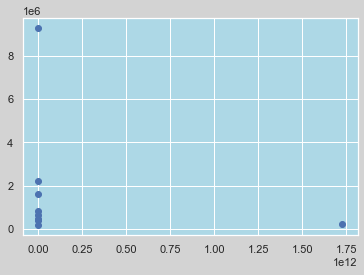

In [1775]:
plt.scatter(y_pred[:10], y_test[:10])